In [22]:
from tinkoff.invest import Client
from tinkoff.invest.constants import INVEST_GRPC_API_SANDBOX
import numpy as np
import matplotlib.pyplot as plt


In [6]:
TOKEN = "t.dliBtI1Ts_2UZJqhmUgbhzs01Lw6dL5cSUJoDk60y8k0eMVMcX5CbG6i-taBlS4ea3lFcS0pfNjgBzooPgu99A"

with Client(TOKEN, target=INVEST_GRPC_API_SANDBOX) as client:
    print(client.users.get_accounts())


GetAccountsResponse(accounts=[])


In [10]:
from datetime import timedelta

from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
from tinkoff.invest.utils import now

candles = []

def main():
    with Client(TOKEN) as client:
        for candle in client.get_all_candles(
            instrument_id="BBG004730N88",
            from_=now() - timedelta(days=365),
            interval=CandleInterval.CANDLE_INTERVAL_HOUR,
            candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
        ):
            candles.append(candle)

if __name__ == "__main__":
    main()


HistoricCandle(open=Quotation(units=225, nano=220000000), high=Quotation(units=225, nano=880000000), low=Quotation(units=225, nano=100000000), close=Quotation(units=225, nano=190000000), volume=505577, time=datetime.datetime(2023, 4, 17, 13, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=225, nano=200000000), high=Quotation(units=226, nano=300000000), low=Quotation(units=224, nano=870000000), close=Quotation(units=226, nano=100000000), volume=503381, time=datetime.datetime(2023, 4, 17, 14, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=226, nano=100000000), high=Quotation(units=226, nano=870000000), low=Quotation(units=226, nano=100000000), close=Quotation(units=226, nano=630000000), volume=582911, time=datetime.datetime(2023, 4, 17, 15, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle

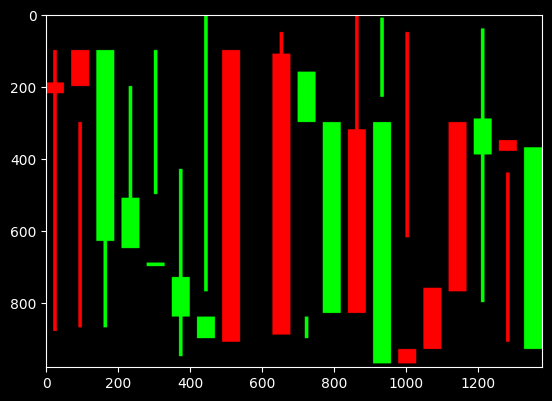

In [52]:
def draw_candles(mas):
    _min = min([candle.low.nano for candle in mas]) // 10**6
    _max = max([candle.high.nano for candle in mas]) // 10**6
    canvas = np.zeros((_max - _min + 40, len(mas) * 70 - 20, 3), float)

    for i, candle in enumerate(mas):
        color = [1, 0, 0] if candle.open.nano > candle.close.nano else [0, 1, 0]
        print(candle)
        height = slice(*sorted([candle.close.nano // 10**6, candle.open.nano // 10**6]))
        width = slice(i * 70, i * 70 + 50)
        canvas[height, width] = color

        height = slice(*sorted([candle.low.nano // 10**6, candle.high.nano // 10**6]))
        width = slice(i * 70 + 20, i * 70 + 30)
        canvas[height, width] = color

    plt.imshow(canvas)


draw_candles(candles[:20])


In [20]:
vars(candles[0])

{'open': Quotation(units=225, nano=220000000),
 'high': Quotation(units=225, nano=880000000),
 'low': Quotation(units=225, nano=100000000),
 'close': Quotation(units=225, nano=190000000),
 'volume': 505577,
 'time': datetime.datetime(2023, 4, 17, 13, 0, tzinfo=datetime.timezone.utc),
 'is_complete': True,
 'candle_source': <CandleSource.CANDLE_SOURCE_EXCHANGE: 1>}

In [35]:
vars(candles[1])

{'open': Quotation(units=225, nano=200000000),
 'high': Quotation(units=226, nano=300000000),
 'low': Quotation(units=224, nano=870000000),
 'close': Quotation(units=226, nano=100000000),
 'volume': 503381,
 'time': datetime.datetime(2023, 4, 17, 14, 0, tzinfo=datetime.timezone.utc),
 'is_complete': True,
 'candle_source': <CandleSource.CANDLE_SOURCE_EXCHANGE: 1>}

In [53]:
import matplotlib.pyplot as plt

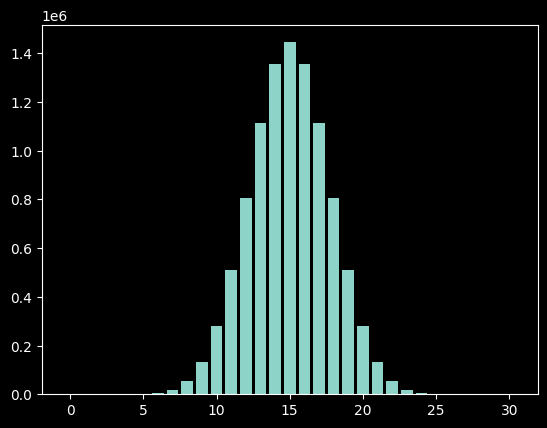

In [68]:
def layer(values):
    new_values = [0 for _ in range(len(values) + 1)]
    for n, i in enumerate(values):
        new_values[n] += i // 2
        new_values[n + 1] += i // 2
    return new_values


def vis(values):
    plt.bar(range(len(values)), values)


values = [1e+7]

layers = 30
for _ in range(layers):
    values = layer(values)

vis(values)


In [71]:
from scipy.stats import norm

<BarContainer object of 34 artists>

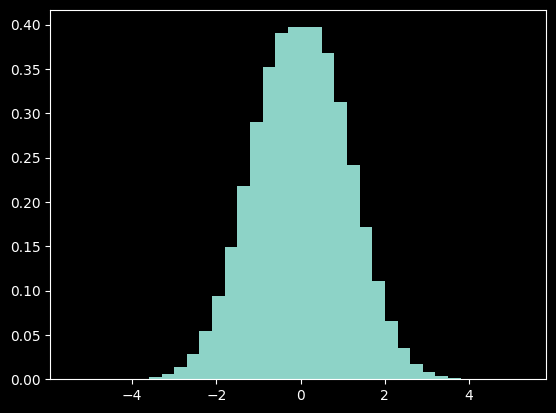

In [88]:
x = np.arange(-5, 5, 0.3)

# plot normal distribution with mean 0 and standard deviation 1
plt.bar(x, norm.pdf(x, 0, 1))
